## Submitted by Ashish Mate


# Exploratory Data Analysis - Sports

Task 1 : Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’

In given task we have to find out the most successful teams, players and factors contributing win or loss of a team.

In [1]:
# loading the libraries

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [7]:
# Importing Dataset

df_deliveries = pd.read_csv('deliveries.csv')
df_matches = pd.read_csv('matches.csv')

In [8]:
df_deliveries.head()   # head function print first five rows from Deliveries Dataset

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
df_deliveries.tail()   #tail function print last five rows of our dataset

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179077,11415,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,0,0,0,SN Thakur,lbw,NaN


In [6]:
df_matches.head()    # head function print first five rows from Matches Dataset

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [10]:
print(df_deliveries.describe()) 

            match_id         inning           over           ball  \
count  179078.000000  179078.000000  179078.000000  179078.000000   
mean     1802.252957       1.482952      10.162488       3.615587   
std      3472.322805       0.502074       5.677684       1.806966   
min         1.000000       1.000000       1.000000       1.000000   
25%       190.000000       1.000000       5.000000       2.000000   
50%       379.000000       1.000000      10.000000       4.000000   
75%       567.000000       2.000000      15.000000       5.000000   
max     11415.000000       5.000000      20.000000       9.000000   

       is_super_over      wide_runs       bye_runs    legbye_runs  \
count  179078.000000  179078.000000  179078.000000  179078.000000   
mean        0.000452       0.036721       0.004936       0.021136   
std         0.021263       0.251161       0.116480       0.194908   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.0000

In [11]:
print(df_matches.describe())

                 id       season  dl_applied  win_by_runs  win_by_wickets
count    756.000000   756.000000  756.000000   756.000000      756.000000
mean    1792.178571  2013.444444    0.025132    13.283069        3.350529
std     3464.478148     3.366895    0.156630    23.471144        3.387963
min        1.000000  2008.000000    0.000000     0.000000        0.000000
25%      189.750000  2011.000000    0.000000     0.000000        0.000000
50%      378.500000  2013.000000    0.000000     0.000000        4.000000
75%      567.250000  2016.000000    0.000000    19.000000        6.000000
max    11415.000000  2019.000000    1.000000   146.000000       10.000000


In [23]:
print("Deliveries Dataset info:")
print(df_deliveries.info())
print('\n')

print("Matches Dataset info:")
print(df_matches.info())
print('\n')

Deliveries Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
match_id            179078 non-null int64
inning              179078 non-null int64
batting_team        179078 non-null object
bowling_team        179078 non-null object
over                179078 non-null int64
ball                179078 non-null int64
batsman             179078 non-null object
non_striker         179078 non-null object
bowler              179078 non-null object
is_super_over       179078 non-null int64
wide_runs           179078 non-null int64
bye_runs            179078 non-null int64
legbye_runs         179078 non-null int64
noball_runs         179078 non-null int64
penalty_runs        179078 non-null int64
batsman_runs        179078 non-null int64
extra_runs          179078 non-null int64
total_runs          179078 non-null int64
player_dismissed    8834 non-null object
dismissal_kind      8834 non-null object
fielder             6

## Null values present in dataset.
cheking there is any null values present in dataset.

In [28]:
print('Null Values Of Deliveries Dataframe :\n', df_deliveries.isnull().sum())
print('\n')
print('Null Values Of Matches Dataframe :\n', df_matches.isnull().sum())

Null Values Of Deliveries Dataframe :
 match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64


Null Values Of Matches Dataframe :
 id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                

## Find Out the Most Successful Teams
finding most successful teams and visulization using Pie Chart

In [42]:
#which team won maximum number of matches

pie_chart = df_matches['winner'].value_counts()
print ('Team which won maximum number of matches in IPL and First Top Three Teams :\n\n', pie_chart.head(3))
print('\n')

#which team won minimum number of matches
print ('Team which won minimum number of matches in IPL :\n\n', pie_chart.tail(1))

Team which won maximum number of matches in IPL and First Top Three Teams :

 Mumbai Indians           109
Chennai Super Kings      100
Kolkata Knight Riders     92
Name: winner, dtype: int64


Team which won minimum number of matches in IPL :

 Rising Pune Supergiants    5
Name: winner, dtype: int64


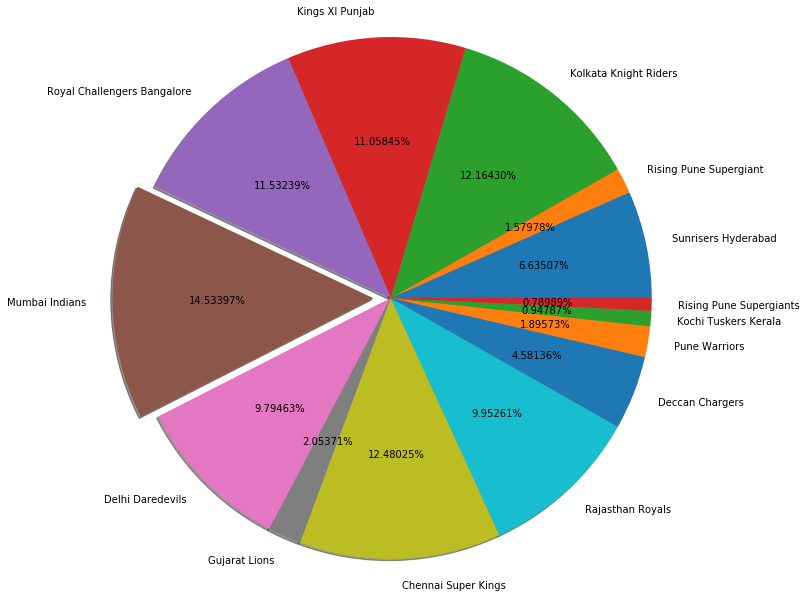

In [36]:
labels = ['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala','Rising Pune Supergiants']
values = [42,10,77,70,73,92,62,13,79,63,29,12,6,5]
explode = [0,0,0,0,0,0.2,0,0,0,0,0,0,0,0]
fig1,ax1 = plt.subplots()
ax1.pie(values,labels=labels,explode=explode,shadow=True,radius=3,autopct='%.5f%%')
plt.show()

Visulization Of data using Pie Chart

## Analysis of Players and Factors Contributing Win or Loss a Team.

In [59]:
# Maximum times Player of the match 

print('Number Of Matches Played :',df_matches.shape[0])
print("Number Of Seasons Played : ",df_matches['season'].value_counts().nunique())
print('\n')
print("Top 10 Prominent Players of IPL : \n", df_matches['player_of_match'].value_counts()[:10])
print('\n')
print('Maximum times Player of the match Batsman: ')
print (df_matches['player_of_match'].value_counts().head(1))


Number Of Matches Played : 756
Number Of Seasons Played :  7


Top 10 Prominent Players of IPL : 
 CH Gayle          21
AB de Villiers    20
MS Dhoni          17
DA Warner         17
RG Sharma         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
AM Rahane         12
Name: player_of_match, dtype: int64


Maximum times Player of the match Batsman: 
CH Gayle    21
Name: player_of_match, dtype: int64


In [64]:
print("Most Winning Team and Number Of Matches: \n",df_matches['winner'].value_counts()[:5])
print('\n')

print("Most Winning Team: \n",df_matches['winner'].value_counts().idxmax())
print('\n')

print("Player Of The Match & Number Of Matches : \n",df_matches['player_of_match'].value_counts()[:5])
print('\n')

print("Player Of The Match For Max . Matches : \n",df_matches['player_of_match'].value_counts().idxmax())

Most Winning Team and Number Of Matches: 
 Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Name: winner, dtype: int64


Most Winning Team: 
 Mumbai Indians


Player Of The Match & Number Of Matches : 
 CH Gayle          21
AB de Villiers    20
MS Dhoni          17
DA Warner         17
RG Sharma         17
Name: player_of_match, dtype: int64


Player Of The Match For Max . Matches : 
 CH Gayle


## Factors contributing win or loss of a team.
from below factors we check:
1.see if winning a toss does an impact on winning game.

In [53]:
win_loss = df_matches[['toss_winner','winner']]
win_loss['toss_vs_win'] = win_loss.apply(lambda x : 1 if x['toss_winner'] == x['winner'] else 0, axis=1)
# Manually validate random records. 0 = No impact, 1 = Impact
win_loss.sample(n=5)


C:\Users\HP\Anaconda3\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,toss_winner,winner,toss_vs_win
627,Delhi Daredevils,Delhi Daredevils,1
376,Rajasthan Royals,Mumbai Indians,0
284,Rajasthan Royals,Chennai Super Kings,0
511,Kings XI Punjab,Kings XI Punjab,1
528,Rajasthan Royals,Rajasthan Royals,1


In [68]:
# won by highest runs and highest wickets

print("Match where team won by highest runs:\n\n",df_matches.iloc[df_matches['win_by_runs'].idxmax()])
print('\n')
print("Match where team won by highest wickets:\n\n",df_matches.iloc[df_matches['win_by_wickets'].idxmax()])

Match where team won by highest runs:

 id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object


Match where team won by highest wickets:

 id                                                      3
season                                               2017
city                                               Rajkot
date                                           2017-04-07
team1      

In [69]:
df_matches.corr()['win_by_runs'].sort_values(ascending=False)

win_by_runs       1.000000
dl_applied       -0.016349
season           -0.037529
id               -0.039403
win_by_wickets   -0.560420
Name: win_by_runs, dtype: float64

In [70]:
df_matches.corr()['win_by_wickets'].sort_values(ascending=False)

win_by_wickets    1.000000
season           -0.009379
dl_applied       -0.011631
id               -0.012239
win_by_runs      -0.560420
Name: win_by_wickets, dtype: float64

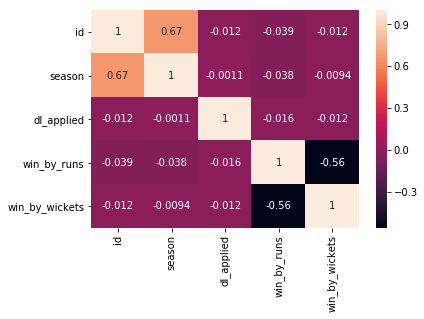

In [71]:
sns.heatmap(df_matches.corr(),annot=True)